<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li></ul></div>

# Description

Aim: just vizualize the results of the code. 

# Load

In [1]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri

from result_analysis import print_final_flows

from result_analysis import plot_cost_all_path

import pandas as pd

In [38]:
path='Data/10Nodes/outputs/L_comparison/'

In [42]:
for f in os.listdir(path):
    print(f)
    f=f.split(".")[0]
    print(f.split("_"))

output_L_10_ni_5000_no_20.pkl
['output', 'L', '10', 'ni', '5000', 'no', '20']
output_L_1000_ni_5000_no_20.pkl
['output', 'L', '1000', 'ni', '5000', 'no', '20']
output_L_100000_ni_5000_no_20.pkl
['output', 'L', '100000', 'ni', '5000', 'no', '20']
output_L_100_ni_5000_no_20.pkl
['output', 'L', '100', 'ni', '5000', 'no', '20']
output_L_10000_ni_5000_no_20.pkl
['output', 'L', '10000', 'ni', '5000', 'no', '20']


In [3]:
with open(os.path.join(path, 'output.pkl'), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance = pickle.load(f)

In [47]:
n_outer

26

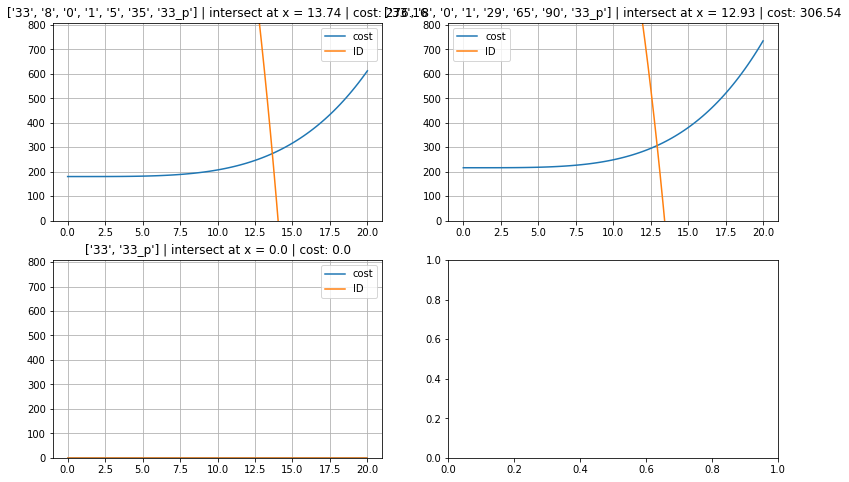

In [5]:
plot_cost_all_path(G_FW[0], OD, '33', '33_p')

In [20]:
final_=pd.DataFrame(columns=['o','d','f_m','f_r', 'cost'])

for e in G_FW[-1].edges():
    data=np.array([e[0],e[1], np.around(G_FW[-1][e[0]][e[1]]['f_m'],2), np.around(G_FW[-1][e[0]][e[1]]['f_r'],2), int(G_FW[-1][e[0]][e[1]]['cost'])])
    l=pd.DataFrame(columns=final_.columns,data=data.reshape(1,5))
    final_=final_.append(l,ignore_index=True)

In [15]:
path=['33','8','0','1','5','35','33_p']

edges_path=[]

for i in range(len(path)-1):
    edges_path.append((path[i],path[i+1]))

In [31]:
cost_tot=0
for e in edges_path:
    cost_crt=G_FW[-1][e[0]][e[1]]['cost']
    print(e[0],e[1],np.around(cost_crt,2), np.around(G_FW[-1][e[0]][e[1]]['f_m'],2)+ np.around(G_FW[-1][e[0]][e[1]]['f_r'],2))
    cost_tot+=cost_crt

33 8 493.71 30.35
8 0 388.9 28.44
0 1 1288.28 39.03
1 5 379.09 28.23
5 35 45.14 11.41
35 33_p 1255.27 1.41


In [30]:
cost_tot


3850.392110161443

In [29]:
G_FW[-1].nodes['0_p']['pot']

3849.0

In [27]:
cost_tot

3850.392110161443

In [21]:
final_

,o,d,f_m,f_r,cost
0,0,1,17.59,21.44,1288
1,0,2,19.99,0.52,131
2,0,3,20.0,0.47,130
3,0,7,29.77,0.1,466
4,0,8,16.22,12.35,395
5,0,24,0.0,0.0,36
6,0,25,0.0,0.0,36
7,0,69,17.22,0.0,83
8,0,R,0.0,10.04,414931
9,0,0_p,0.0,0.0,3849


In [9]:
final_[final_['d']=='33_p']

,o,d,f_m,f_r
103,33,33_p,18.59,0.0
109,35,33_p,1.41,0.0
306,90,33_p,0.0,0.0


In [10]:
balance.shape

(26, 101)

In [14]:
np.max(np.abs(balance[-1,:]))

0.08479503316577919

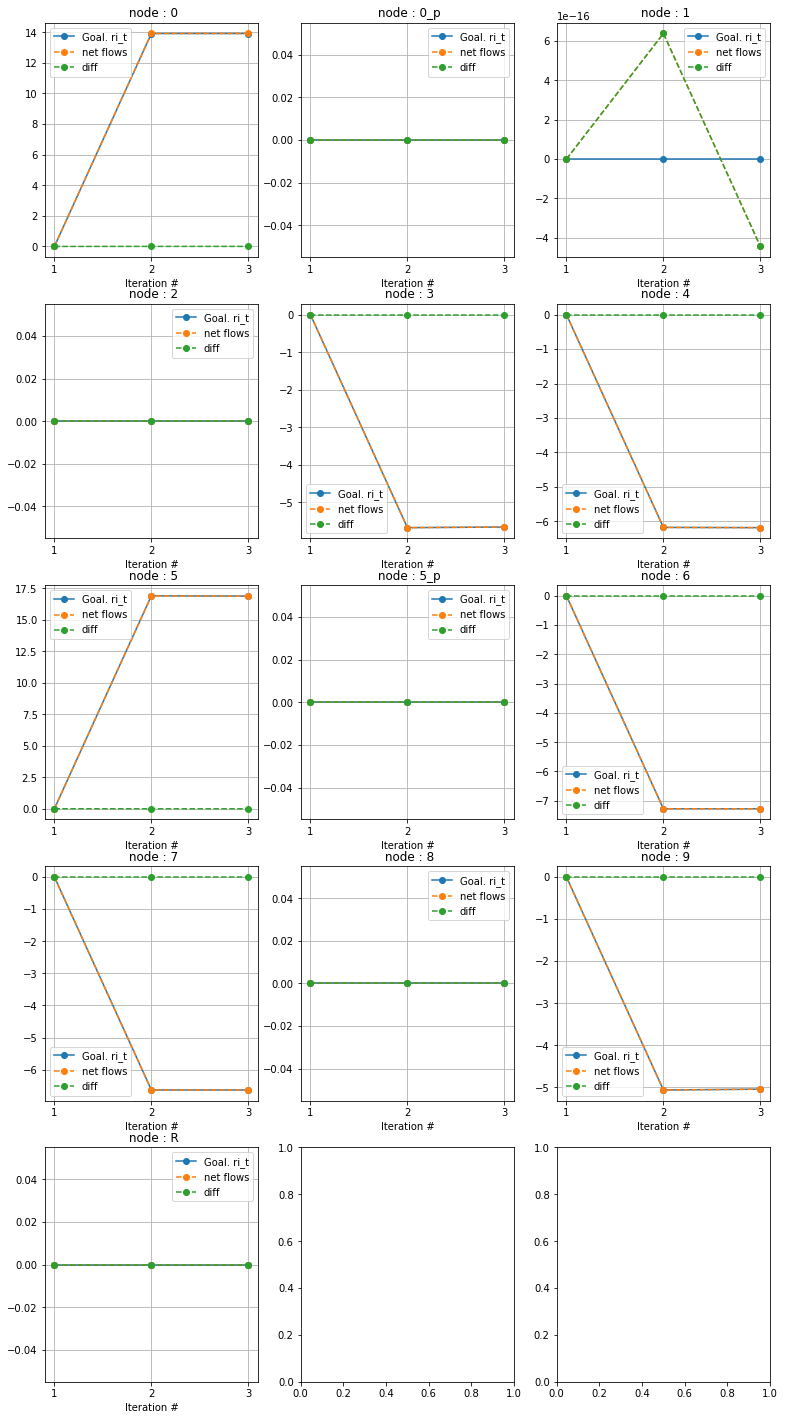

In [166]:
plot_ri(ri_FW, G_FW, compare = True)

<Figure size 432x288 with 0 Axes>

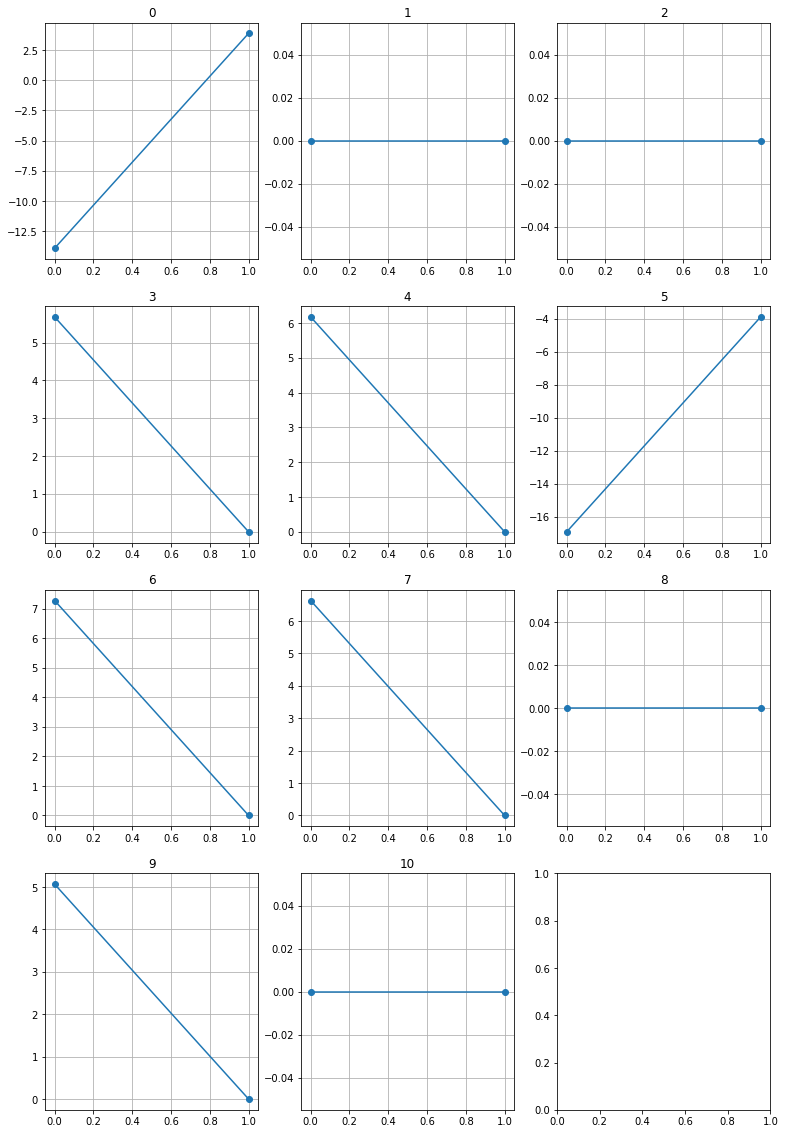

In [59]:
plt.figure()
nplots=balance.shape[1]
ncols=3
nrows=int(np.ceil(nplots/ncols))
_, axes = plt.subplots(nrows,ncols, figsize=(13, 5*nrows))
i=0
j=0
for n in range(balance.shape[1]):
    if j==ncols:
        j=0
        i+=1
    if i==nrows:
        i=0
    axes[i,j].plot(balance[:,n],'o-')
    axes[i,j].grid(True)
    axes[i,j].set_title(n)
#     axes[n].set_ylim([np.min(balance[-5:,n])*.9, np.max(balance[-5:,n])*1.1])
    j+=1

In [170]:
balance.shape

(3, 11)

0.006253986596572074


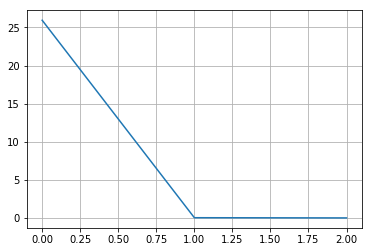

In [171]:
balance_norm=np.linalg.norm(balance,axis=1)

plt.plot(balance_norm)
plt.grid(True)
# plt.yscale('log')

print(balance_norm[-1])

Some way of measuring the amplitudes of oscillations? 

In [156]:
nx.write_graphml(G_FW[-1],os.path.join(path,'graph.graphml'))